# Generate Species for Low Temperature Pathways

The goal of this notebook is to allow you to generate all the species that would occur by systematically applying known low-temperature pathways to a starting fuel molecule(s).

You might do this to generate species that you then put into an RMG input file, to help RMG find the low temperature pathways. An RMG input file species block is generated at the end, to facilitate this.

These are the pathways, from https://doi.org/10.1016/j.combustflame.2015.07.005
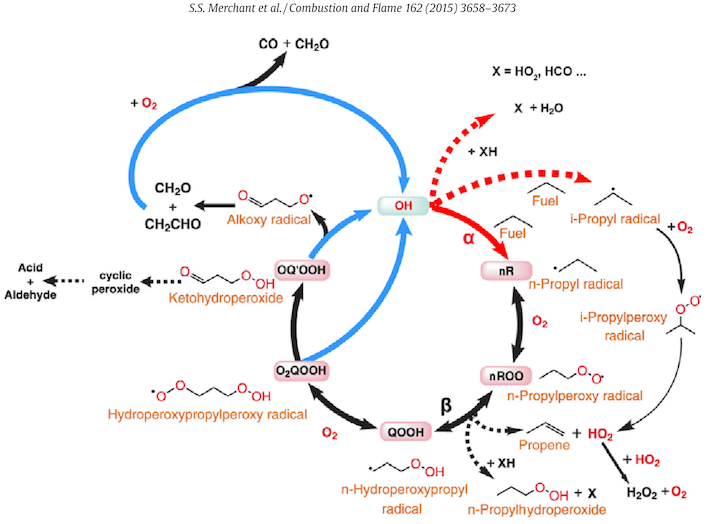

In [1]:
import sys, os
sys.path.insert(0,os.path.expandvars("$RMGpy"))

In [2]:
import rmgpy
from rmgpy.rmg.main import RMG
from rmgpy.rmg.model import CoreEdgeReactionModel
from rmgpy import settings
from IPython.display import display
from arkane.output import prettify
print("The version of rmg runnning is:" + str(rmgpy.__version__))

RDKit WARNING: [13:07:43] Enabling RDKit 2019.09.1 jupyter extensions


The version of rmg runnning is:3.0.0


Declare database variables here by changing the thermo and reaction libraries. These are not actually used.

In [3]:
database = """
database(
    thermoLibraries = ['BurkeH2O2','primaryThermoLibrary','DFT_QCI_thermo','CBS_QB3_1dHR'],
    reactionLibraries = [],
    seedMechanisms = [],
    kineticsDepositories = ['training'],
    kineticsFamilies = [
        'H_Abstraction',
        'R_Recombination',
        'R_Addition_MultipleBond',
        'intra_H_migration',
        'HO2_Elimination_from_PeroxyRadical',
        'intra_OH_migration',
        'Cyclic_Ether_Formation'
    ],
    kineticsEstimator = 'rate rules',
)

options(
    verboseComments=True,  # Set to True for detailed kinetics comments
)
"""

Just put O2 in the model for now

In [4]:
speciesList = """
species(
    label='O2',
    reactive=True,
    structure=SMILES("[O][O]")
)
"""

In [5]:
# Write input file to disk
os.makedirs('temp', exist_ok=True)
inputFile = open('temp/input.py','w')
inputFile.write(database)
inputFile.write(speciesList)
inputFile.close()

In [6]:
# initialize RMG instance
# This does all the hard work of loading the databases etc.
# which can take a while
from rmgpy.tools.generatereactions import RMG
kwargs = {
            'restart': '',
            'walltime': '00:00:00:00',
            'kineticsdatastore': True
    }
rmg = RMG(input_file='temp/input.py', output_directory='temp')

rmg.initialize(**kwargs)


In [7]:
from rmgpy.molecule import Molecule

In [8]:
from collections import defaultdict
molecules = defaultdict(set)

def union(*args):
    out = set()
    for a in args:
        out.update(molecules[a])
    return out

# Put your fuel molecule(s) here:

In [9]:
# you may have more than one if you wish, just repeat this line
molecules['fuel'].add(Molecule(smiles='CC(C)CC(C)(C)C'))

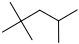

In [10]:
for m in molecules['fuel']:
    display(m)

# ☝️☝️☝️☝️☝️☝️☝️☝️

In [11]:
molecules['H'].add(Molecule(smiles='[H]'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CC(C)CC(C)(C)C")},
             'H': {Molecule(smiles="[H]")}})

In [12]:
union('fuel','H')

{Molecule(smiles="[H]"), Molecule(smiles="CC(C)CC(C)(C)C")}

[H] + CC(C)CC(C)(C)C <=> [H][H] + C[C](C)CC(C)(C)C


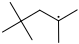

[H] + CC(C)CC(C)(C)C <=> [H][H] + CC(C)[CH]C(C)(C)C


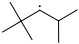

[H] + CC(C)CC(C)(C)C <=> [H][H] + [CH2]C(C)(C)CC(C)C


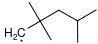

[H] + CC(C)CC(C)(C)C <=> [H][H] + [CH2]C(C)CC(C)(C)C


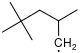

defaultdict(set,
            {'fuel': {Molecule(smiles="CC(C)CC(C)(C)C")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="[CH2]C(C)(C)CC(C)C"),
              Molecule(smiles="CC(C)[CH]C(C)(C)C"),
              Molecule(smiles="C[C](C)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)CC(C)(C)C")}})

In [13]:
# React fuel with H via H_Abstraction to get the radicals R

h = list(molecules['H'])[0]
for s in molecules['fuel']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, h), only_families='H_Abstraction')
    for r in reactions:
        print(r)
        m = r.products[1].molecule[0]
        display(m)
        molecules['R'].add(m)
molecules

In [14]:
molecules['O2'].add(Molecule(smiles='[O][O]'))
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CC(C)CC(C)(C)C")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="[CH2]C(C)(C)CC(C)C"),
              Molecule(smiles="CC(C)[CH]C(C)(C)C"),
              Molecule(smiles="C[C](C)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)CC(C)(C)C")},
             'O2': {Molecule(smiles="[O][O]")}})

[O][O] + [CH2]C(C)(C)CC(C)C <=> CC(C)CC(C)(C)CO[O]


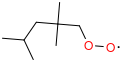

[O][O] + CC(C)[CH]C(C)(C)C <=> CC(C)C(O[O])C(C)(C)C


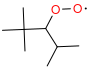

[O][O] + C[C](C)CC(C)(C)C <=> CC(C)(C)CC(C)(C)O[O]


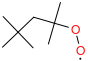

[O][O] + [CH2]C(C)CC(C)(C)C <=> CC(CO[O])CC(C)(C)C


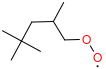

defaultdict(set,
            {'fuel': {Molecule(smiles="CC(C)CC(C)(C)C")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="[CH2]C(C)(C)CC(C)C"),
              Molecule(smiles="CC(C)[CH]C(C)(C)C"),
              Molecule(smiles="C[C](C)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)CC(C)(C)C")},
             'O2': {Molecule(smiles="[O][O]")},
             'ROO': {Molecule(smiles="CC(CO[O])CC(C)(C)C"),
              Molecule(smiles="CC(C)CC(C)(C)CO[O]"),
              Molecule(smiles="CC(C)C(O[O])C(C)(C)C"),
              Molecule(smiles="CC(C)(C)CC(C)(C)O[O]")}})

In [15]:
# React R with O2 to get the ROO
o2 = list(molecules['O2'])[0]
for s in molecules['R']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, o2), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['ROO'].add(m)
molecules

CC(CO[O])CC(C)(C)C <=> CC([CH]OO)CC(C)(C)C


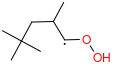

CC(CO[O])CC(C)(C)C <=> C[C](COO)CC(C)(C)C


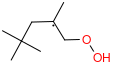

CC(CO[O])CC(C)(C)C <=> CC([CH]C(C)(C)C)COO


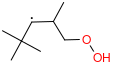

CC(CO[O])CC(C)(C)C <=> [CH2]C(COO)CC(C)(C)C


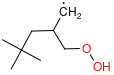

CC(CO[O])CC(C)(C)C <=> [CH2]C(C)(C)CC(C)COO


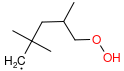

CC(C)CC(C)(C)CO[O] <=> CC(C)CC(C)(C)[CH]OO


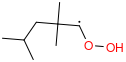

CC(C)CC(C)(C)CO[O] <=> CC(C)[CH]C(C)(C)COO


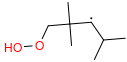

CC(C)CC(C)(C)CO[O] <=> [CH2]C(C)(COO)CC(C)C


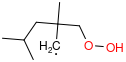

CC(C)CC(C)(C)CO[O] <=> C[C](C)CC(C)(C)COO


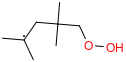

CC(C)CC(C)(C)CO[O] <=> [CH2]C(C)CC(C)(C)COO


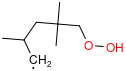

CC(C)C(O[O])C(C)(C)C <=> CC(C)[C](OO)C(C)(C)C


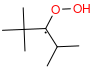

CC(C)C(O[O])C(C)(C)C <=> C[C](C)C(OO)C(C)(C)C


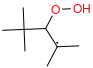

CC(C)C(O[O])C(C)(C)C <=> [CH2]C(C)(C)C(OO)C(C)C


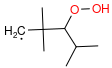

CC(C)C(O[O])C(C)(C)C <=> [CH2]C(C)C(OO)C(C)(C)C


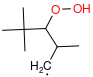

CC(C)(C)CC(C)(C)O[O] <=> CC(C)(C)[CH]C(C)(C)OO


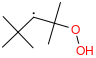

CC(C)(C)CC(C)(C)O[O] <=> [CH2]C(C)(CC(C)(C)C)OO


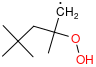

CC(C)(C)CC(C)(C)O[O] <=> [CH2]C(C)(C)CC(C)(C)OO


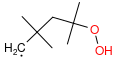

defaultdict(set,
            {'fuel': {Molecule(smiles="CC(C)CC(C)(C)C")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="[CH2]C(C)(C)CC(C)C"),
              Molecule(smiles="CC(C)[CH]C(C)(C)C"),
              Molecule(smiles="C[C](C)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)CC(C)(C)C")},
             'O2': {Molecule(smiles="[O][O]")},
             'ROO': {Molecule(smiles="CC(CO[O])CC(C)(C)C"),
              Molecule(smiles="CC(C)CC(C)(C)CO[O]"),
              Molecule(smiles="CC(C)C(O[O])C(C)(C)C"),
              Molecule(smiles="CC(C)(C)CC(C)(C)O[O]")},
             'QOOH': {Molecule(smiles="CC(C)(C)[CH]C(C)(C)OO"),
              Molecule(smiles="[CH2]C(C)(CC(C)(C)C)OO"),
              Molecule(smiles="[CH2]C(C)(C)CC(C)(C)OO"),
              Molecule(smiles="[CH2]C(COO)CC(C)(C)C"),
              Molecule(smiles="CC([CH]OO)CC(C)(C)C"),
              Molecule(smiles="C[C](COO)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)(C)CC(C)COO"),

In [16]:
# Isomerize ROO to get QOOH
for s in molecules['ROO']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, ), only_families='intra_H_migration')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['QOOH'].add(m)
molecules

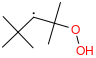

For reactant CC(C)(C)[CH]C(C)(C)OO :
CC(C)(C)[CH]C(C)(C)OO <=> CC(C)(C)C1OC1(C)C + [OH]


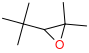

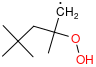

For reactant [CH2]C(C)(CC(C)(C)C)OO :
[CH2]C(C)(CC(C)(C)C)OO <=> CC(C)(C)CC1(C)CO1 + [OH]


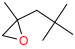

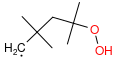

For reactant [CH2]C(C)(C)CC(C)(C)OO :
[CH2]C(C)(C)CC(C)(C)OO <=> CC1(C)COC(C)(C)C1 + [OH]


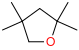

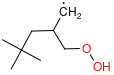

For reactant [CH2]C(COO)CC(C)(C)C :
[CH2]C(COO)CC(C)(C)C <=> CC(C)(C)CC1COC1 + [OH]


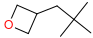

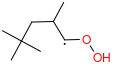

For reactant CC([CH]OO)CC(C)(C)C :


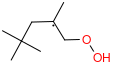

For reactant C[C](COO)CC(C)(C)C :
C[C](COO)CC(C)(C)C <=> CC(C)(C)CC1(C)CO1 + [OH]


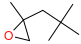

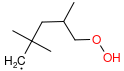

For reactant [CH2]C(C)(C)CC(C)COO :
[CH2]C(C)(C)CC(C)COO <=> CC1COCC(C)(C)C1 + [OH]


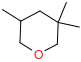

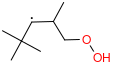

For reactant CC([CH]C(C)(C)C)COO :
CC([CH]C(C)(C)C)COO <=> CC1COC1C(C)(C)C + [OH]


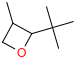

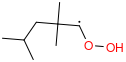

For reactant CC(C)CC(C)(C)[CH]OO :


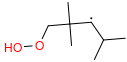

For reactant CC(C)[CH]C(C)(C)COO :
CC(C)[CH]C(C)(C)COO <=> CC(C)C1OCC1(C)C + [OH]


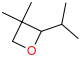

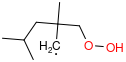

For reactant [CH2]C(C)(COO)CC(C)C :
[CH2]C(C)(COO)CC(C)C <=> CC(C)CC1(C)COC1 + [OH]


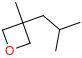

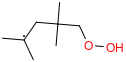

For reactant C[C](C)CC(C)(C)COO :
C[C](C)CC(C)(C)COO <=> CC1(C)COC(C)(C)C1 + [OH]


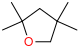

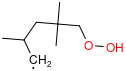

For reactant [CH2]C(C)CC(C)(C)COO :
[CH2]C(C)CC(C)(C)COO <=> CC1COCC(C)(C)C1 + [OH]


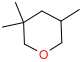

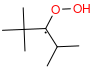

For reactant CC(C)[C](OO)C(C)(C)C :


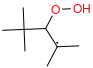

For reactant C[C](C)C(OO)C(C)(C)C :
C[C](C)C(OO)C(C)(C)C <=> CC(C)(C)C1OC1(C)C + [OH]


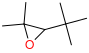

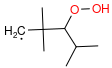

For reactant [CH2]C(C)(C)C(OO)C(C)C :
[CH2]C(C)(C)C(OO)C(C)C <=> CC(C)C1OCC1(C)C + [OH]


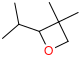

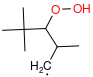

For reactant [CH2]C(C)C(OO)C(C)(C)C :
[CH2]C(C)C(OO)C(C)(C)C <=> CC1COC1C(C)(C)C + [OH]


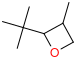

cyQO


defaultdict(set,
            {'fuel': {Molecule(smiles="CC(C)CC(C)(C)C")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="[CH2]C(C)(C)CC(C)C"),
              Molecule(smiles="CC(C)[CH]C(C)(C)C"),
              Molecule(smiles="C[C](C)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)CC(C)(C)C")},
             'O2': {Molecule(smiles="[O][O]")},
             'ROO': {Molecule(smiles="CC(CO[O])CC(C)(C)C"),
              Molecule(smiles="CC(C)CC(C)(C)CO[O]"),
              Molecule(smiles="CC(C)C(O[O])C(C)(C)C"),
              Molecule(smiles="CC(C)(C)CC(C)(C)O[O]")},
             'QOOH': {Molecule(smiles="CC(C)(C)[CH]C(C)(C)OO"),
              Molecule(smiles="[CH2]C(C)(CC(C)(C)C)OO"),
              Molecule(smiles="[CH2]C(C)(C)CC(C)(C)OO"),
              Molecule(smiles="[CH2]C(COO)CC(C)(C)C"),
              Molecule(smiles="CC([CH]OO)CC(C)(C)C"),
              Molecule(smiles="C[C](COO)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)(C)CC(C)COO"),

In [17]:
# Another Chain branching route 
# Decomposition reaction occurs QOOH within itself to form a Cyclic ether QOOH + [OH] radical
# meaning we need to abstract the OH molecule to make a radical 

assert "Cyclic_Ether_Formation"  in rmg.database.kinetics.families

for s in molecules['QOOH']:
    display(s)
    print(f"For reactant {s.to_smiles()} :")
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='Cyclic_Ether_Formation')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['cyQO'].add(m)
print('cyQO')
molecules

[O][O] + CC(C)(C)[CH]C(C)(C)OO <=> CC(C)(C)C(O[O])C(C)(C)OO


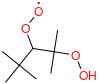

[O][O] + [CH2]C(C)(CC(C)(C)C)OO <=> CC(C)(C)CC(C)(CO[O])OO


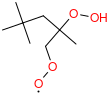

[O][O] + [CH2]C(C)(C)CC(C)(C)OO <=> CC(C)(CO[O])CC(C)(C)OO


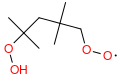

[O][O] + [CH2]C(COO)CC(C)(C)C <=> CC(C)(C)CC(CO[O])COO


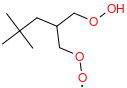

[O][O] + CC([CH]OO)CC(C)(C)C <=> CC(CC(C)(C)C)C(O[O])OO


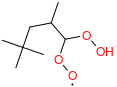

[O][O] + C[C](COO)CC(C)(C)C <=> CC(C)(C)CC(C)(COO)O[O]


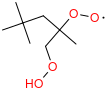

[O][O] + [CH2]C(C)(C)CC(C)COO <=> CC(COO)CC(C)(C)CO[O]


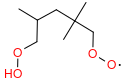

[O][O] + CC([CH]C(C)(C)C)COO <=> CC(COO)C(O[O])C(C)(C)C


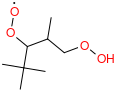

[O][O] + CC(C)CC(C)(C)[CH]OO <=> CC(C)CC(C)(C)C(O[O])OO


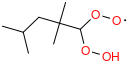

[O][O] + CC(C)[CH]C(C)(C)COO <=> CC(C)C(O[O])C(C)(C)COO


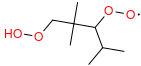

[O][O] + [CH2]C(C)(COO)CC(C)C <=> CC(C)CC(C)(CO[O])COO


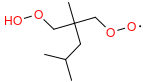

[O][O] + C[C](C)CC(C)(C)COO <=> CC(C)(COO)CC(C)(C)O[O]


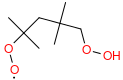

[O][O] + [CH2]C(C)CC(C)(C)COO <=> CC(CO[O])CC(C)(C)COO


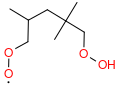

[O][O] + CC(C)[C](OO)C(C)(C)C <=> CC(C)C(O[O])(OO)C(C)(C)C


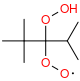

[O][O] + C[C](C)C(OO)C(C)(C)C <=> CC(C)(C)C(OO)C(C)(C)O[O]


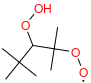

[O][O] + [CH2]C(C)(C)C(OO)C(C)C <=> CC(C)C(OO)C(C)(C)CO[O]


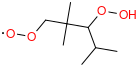

[O][O] + [CH2]C(C)C(OO)C(C)(C)C <=> CC(CO[O])C(OO)C(C)(C)C


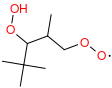

defaultdict(set,
            {'fuel': {Molecule(smiles="CC(C)CC(C)(C)C")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="[CH2]C(C)(C)CC(C)C"),
              Molecule(smiles="CC(C)[CH]C(C)(C)C"),
              Molecule(smiles="C[C](C)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)CC(C)(C)C")},
             'O2': {Molecule(smiles="[O][O]")},
             'ROO': {Molecule(smiles="CC(CO[O])CC(C)(C)C"),
              Molecule(smiles="CC(C)CC(C)(C)CO[O]"),
              Molecule(smiles="CC(C)C(O[O])C(C)(C)C"),
              Molecule(smiles="CC(C)(C)CC(C)(C)O[O]")},
             'QOOH': {Molecule(smiles="CC(C)(C)[CH]C(C)(C)OO"),
              Molecule(smiles="[CH2]C(C)(CC(C)(C)C)OO"),
              Molecule(smiles="[CH2]C(C)(C)CC(C)(C)OO"),
              Molecule(smiles="[CH2]C(COO)CC(C)(C)C"),
              Molecule(smiles="CC([CH]OO)CC(C)(C)C"),
              Molecule(smiles="C[C](COO)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)(C)CC(C)COO"),

In [18]:
# React QOOH with O2 to get the O2QOOH
o2 = list(molecules['O2'])[0]
for s in molecules['QOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s, o2), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['O2QOOH'].add(m)
molecules

In [19]:
# What next? OH + keto-hydroperoxide   or   HO2 + alkenyl hydroperoxide 

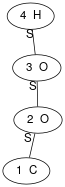

In [20]:
# Next we want O2QOOH on its way towards OH + keto-hydroperoxide
# but in elementary steps it goes via HOOQjOOH made by intra_H_migration
# we will need a template to filter out just these species
# from all the others that can be made by intra_H_migration
from rmgpy.molecule import Group
rjooh = Group().from_adjacency_list("""
1 C u1 {2,S}
2 O u0 {1,S} {3,S}
3 O u0 {2,S} {4,S}
4 H u0 {3,S}
""")
rjooh

Applying intra_H_migration but finding just the HOOQjOOH radicals
CC(CC(C)(C)C)C(O[O])OO <=> CC(CC(C)(C)C)[C](OO)OO


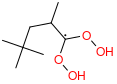

CC(CC(C)(C)C)C(O[O])OO <=> C[C](CC(C)(C)C)C(OO)OO
CC(CC(C)(C)C)C(O[O])OO <=> CC([CH]C(C)(C)C)C(OO)OO
CC(CC(C)(C)C)C(O[O])OO <=> [CH2]C(CC(C)(C)C)C(OO)OO
CC(CC(C)(C)C)C(O[O])OO <=> [CH2]C(C)(C)CC(C)C(OO)OO
CC(C)(C)C(O[O])C(C)(C)OO <=> CC(C)(C)[C](OO)C(C)(C)OO


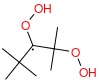

CC(C)(C)C(O[O])C(C)(C)OO <=> [CH2]C(C)(C)C(OO)C(C)(C)OO
CC(C)(C)C(O[O])C(C)(C)OO <=> [CH2]C(C)(OO)C(OO)C(C)(C)C
CC(C)(C)C(O[O])C(C)(C)OO <=> CC(C)(C)C(OO)C(C)(C)O[O]
CC(C)(CO[O])CC(C)(C)OO <=> CC(C)([CH]OO)CC(C)(C)OO


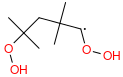

CC(C)(CO[O])CC(C)(C)OO <=> CC(C)([CH]C(C)(C)OO)COO
CC(C)(CO[O])CC(C)(C)OO <=> [CH2]C(C)(COO)CC(C)(C)OO
CC(C)(CO[O])CC(C)(C)OO <=> [CH2]C(C)(CC(C)(C)COO)OO
CC(C)(CO[O])CC(C)(C)OO <=> CC(C)(COO)CC(C)(C)O[O]
CC(C)(C)CC(C)(CO[O])OO <=> CC(C)(C)CC(C)([CH]OO)OO


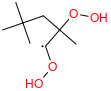

CC(C)(C)CC(C)(CO[O])OO <=> CC(C)(C)[CH]C(C)(COO)OO
CC(C)(C)CC(C)(CO[O])OO <=> [CH2]C(COO)(CC(C)(C)C)OO
CC(C)(C)CC(C)(CO[O])OO <=> CC(C)(C)CC(C)(COO)O[O]
CC(C)(C)CC(C)(CO[O])OO <=> [CH2]C(C)(C)CC(C)(COO)OO
CC(C)(C)CC(CO[O])COO <=> CC(C)(C)CC([CH]OO)COO


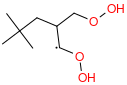

CC(C)(C)CC(CO[O])COO <=> CC(C)(C)C[C](COO)COO
CC(C)(C)CC(CO[O])COO <=> CC(C)(C)[CH]C(COO)COO
CC(C)(C)CC(CO[O])COO <=> CC(C)(C)CC([CH]OO)COO


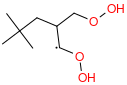

CC(C)(C)CC(CO[O])COO <=> [CH2]C(C)(C)CC(COO)COO
CC(C)(C)CC(C)(COO)O[O] <=> CC(C)(C)[CH]C(C)(COO)OO
CC(C)(C)CC(C)(COO)O[O] <=> CC(C)(C)CC(C)([CH]OO)OO


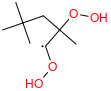

CC(C)(C)CC(C)(COO)O[O] <=> [CH2]C(COO)(CC(C)(C)C)OO
CC(C)(C)CC(C)(COO)O[O] <=> [CH2]C(C)(C)CC(C)(COO)OO
CC(C)(C)CC(C)(COO)O[O] <=> CC(C)(C)CC(C)(CO[O])OO
CC(COO)CC(C)(C)CO[O] <=> CC(COO)CC(C)(C)[CH]OO


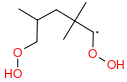

CC(COO)CC(C)(C)CO[O] <=> CC([CH]C(C)(C)COO)COO
CC(COO)CC(C)(C)CO[O] <=> [CH2]C(C)(COO)CC(C)COO
CC(COO)CC(C)(C)CO[O] <=> C[C](COO)CC(C)(C)COO
CC(COO)CC(C)(C)CO[O] <=> CC([CH]OO)CC(C)(C)COO


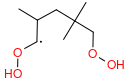

CC(COO)CC(C)(C)CO[O] <=> [CH2]C(COO)CC(C)(C)COO
CC(COO)C(O[O])C(C)(C)C <=> CC(COO)[C](OO)C(C)(C)C


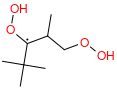

CC(COO)C(O[O])C(C)(C)C <=> C[C](COO)C(OO)C(C)(C)C
CC(COO)C(O[O])C(C)(C)C <=> [CH2]C(C)(C)C(OO)C(C)COO
CC(COO)C(O[O])C(C)(C)C <=> CC([CH]OO)C(OO)C(C)(C)C


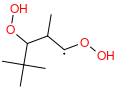

CC(COO)C(O[O])C(C)(C)C <=> [CH2]C(COO)C(OO)C(C)(C)C
CC(COO)C(O[O])C(C)(C)C <=> CC(CO[O])C(OO)C(C)(C)C
CC(C)CC(C)(C)C(O[O])OO <=> CC(C)CC(C)(C)[C](OO)OO


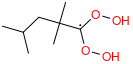

CC(C)CC(C)(C)C(O[O])OO <=> CC(C)[CH]C(C)(C)C(OO)OO
CC(C)CC(C)(C)C(O[O])OO <=> [CH2]C(C)(CC(C)C)C(OO)OO
CC(C)CC(C)(C)C(O[O])OO <=> C[C](C)CC(C)(C)C(OO)OO
CC(C)CC(C)(C)C(O[O])OO <=> [CH2]C(C)CC(C)(C)C(OO)OO
CC(C)C(O[O])C(C)(C)COO <=> CC(C)[C](OO)C(C)(C)COO


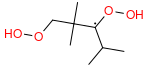

CC(C)C(O[O])C(C)(C)COO <=> C[C](C)C(OO)C(C)(C)COO
CC(C)C(O[O])C(C)(C)COO <=> CC(C)C(OO)C(C)(C)[CH]OO


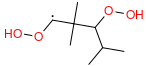

CC(C)C(O[O])C(C)(C)COO <=> [CH2]C(C)(COO)C(OO)C(C)C
CC(C)C(O[O])C(C)(C)COO <=> [CH2]C(C)C(OO)C(C)(C)COO
CC(C)C(O[O])C(C)(C)COO <=> CC(C)C(OO)C(C)(C)CO[O]
CC(C)CC(C)(CO[O])COO <=> CC(C)CC(C)([CH]OO)COO


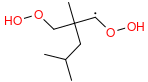

CC(C)CC(C)(CO[O])COO <=> CC(C)[CH]C(C)(COO)COO
CC(C)CC(C)(CO[O])COO <=> CC(C)CC(C)([CH]OO)COO


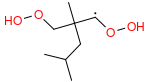

CC(C)CC(C)(CO[O])COO <=> [CH2]C(COO)(COO)CC(C)C
CC(C)CC(C)(CO[O])COO <=> C[C](C)CC(C)(COO)COO
CC(C)CC(C)(CO[O])COO <=> [CH2]C(C)CC(C)(COO)COO
CC(C)(COO)CC(C)(C)O[O] <=> CC(C)([CH]C(C)(C)OO)COO
CC(C)(COO)CC(C)(C)O[O] <=> [CH2]C(C)(CC(C)(C)COO)OO
CC(C)(COO)CC(C)(C)O[O] <=> CC(C)([CH]OO)CC(C)(C)OO


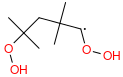

CC(C)(COO)CC(C)(C)O[O] <=> [CH2]C(C)(COO)CC(C)(C)OO
CC(C)(COO)CC(C)(C)O[O] <=> CC(C)(CO[O])CC(C)(C)OO
CC(CO[O])CC(C)(C)COO <=> CC([CH]OO)CC(C)(C)COO


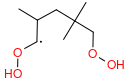

CC(CO[O])CC(C)(C)COO <=> C[C](COO)CC(C)(C)COO
CC(CO[O])CC(C)(C)COO <=> CC([CH]C(C)(C)COO)COO
CC(CO[O])CC(C)(C)COO <=> [CH2]C(COO)CC(C)(C)COO
CC(CO[O])CC(C)(C)COO <=> CC(COO)CC(C)(C)[CH]OO


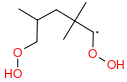

CC(CO[O])CC(C)(C)COO <=> [CH2]C(C)(COO)CC(C)COO
CC(C)C(O[O])(OO)C(C)(C)C <=> C[C](C)C(OO)(OO)C(C)(C)C
CC(C)C(O[O])(OO)C(C)(C)C <=> [CH2]C(C)(C)C(OO)(OO)C(C)C
CC(C)C(O[O])(OO)C(C)(C)C <=> [CH2]C(C)C(OO)(OO)C(C)(C)C
CC(C)(C)C(OO)C(C)(C)O[O] <=> CC(C)(C)[C](OO)C(C)(C)OO


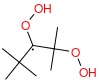

CC(C)(C)C(OO)C(C)(C)O[O] <=> [CH2]C(C)(OO)C(OO)C(C)(C)C
CC(C)(C)C(OO)C(C)(C)O[O] <=> CC(C)(C)C(O[O])C(C)(C)OO
CC(C)(C)C(OO)C(C)(C)O[O] <=> [CH2]C(C)(C)C(OO)C(C)(C)OO
CC(C)C(OO)C(C)(C)CO[O] <=> CC(C)C(OO)C(C)(C)[CH]OO


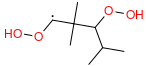

CC(C)C(OO)C(C)(C)CO[O] <=> CC(C)[C](OO)C(C)(C)COO


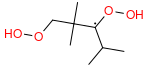

CC(C)C(OO)C(C)(C)CO[O] <=> [CH2]C(C)(COO)C(OO)C(C)C
CC(C)C(OO)C(C)(C)CO[O] <=> C[C](C)C(OO)C(C)(C)COO
CC(C)C(OO)C(C)(C)CO[O] <=> CC(C)C(O[O])C(C)(C)COO
CC(C)C(OO)C(C)(C)CO[O] <=> [CH2]C(C)C(OO)C(C)(C)COO
CC(CO[O])C(OO)C(C)(C)C <=> CC([CH]OO)C(OO)C(C)(C)C


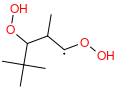

CC(CO[O])C(OO)C(C)(C)C <=> C[C](COO)C(OO)C(C)(C)C
CC(CO[O])C(OO)C(C)(C)C <=> CC(COO)[C](OO)C(C)(C)C


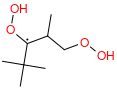

CC(CO[O])C(OO)C(C)(C)C <=> [CH2]C(COO)C(OO)C(C)(C)C
CC(CO[O])C(OO)C(C)(C)C <=> CC(COO)C(O[O])C(C)(C)C
CC(CO[O])C(OO)C(C)(C)C <=> [CH2]C(C)(C)C(OO)C(C)COO
HOOQjOOH


{Molecule(smiles="CC(C)(C)CC([CH]OO)COO"),
 Molecule(smiles="CC(CC(C)(C)C)[C](OO)OO"),
 Molecule(smiles="CC(C)([CH]OO)CC(C)(C)OO"),
 Molecule(smiles="CC(C)(C)[C](OO)C(C)(C)OO"),
 Molecule(smiles="CC(C)(C)CC(C)([CH]OO)OO"),
 Molecule(smiles="CC(COO)CC(C)(C)[CH]OO"),
 Molecule(smiles="CC([CH]OO)CC(C)(C)COO"),
 Molecule(smiles="CC(COO)[C](OO)C(C)(C)C"),
 Molecule(smiles="CC([CH]OO)C(OO)C(C)(C)C"),
 Molecule(smiles="CC(C)CC(C)(C)[C](OO)OO"),
 Molecule(smiles="CC(C)[C](OO)C(C)(C)COO"),
 Molecule(smiles="CC(C)C(OO)C(C)(C)[CH]OO"),
 Molecule(smiles="CC(C)CC(C)([CH]OO)COO")}

In [21]:
# O2QOOH on its way towards OH + keto-hydroperoxide
print("Applying intra_H_migration but finding just the HOOQjOOH radicals")
for s in molecules['O2QOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='intra_H_migration')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        if m.is_subgraph_isomorphic(rjooh):
            display(m)
            molecules['HOOQjOOH'].add(m)
print('HOOQjOOH')
molecules['HOOQjOOH']

Applying R_Addition_MultipleBond to HOOQjOOH to find its Beta Scission products
CC(C)(C)CC(=COO)COO + [H] <=> CC(C)(C)CC([CH]OO)COO
OOC=CCOO + [CH2]C(C)(C)C <=> CC(C)(C)CC([CH]OO)COO
CC(C)(C)CC=COO + [CH2]OO <=> CC(C)(C)CC([CH]OO)COO
CC(C)(C)CC(C=O)COO + [OH] <=> CC(C)(C)CC([CH]OO)COO


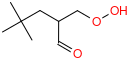

CC(CC(C)(C)C)=C(OO)OO + [H] <=> CC(CC(C)(C)C)[C](OO)OO
CC=C(OO)OO + [CH2]C(C)(C)C <=> CC(CC(C)(C)C)[C](OO)OO
CC(C)(C)CC=C(OO)OO + [CH3] <=> CC(CC(C)(C)C)[C](OO)OO
CC(CC(C)(C)C)C(=O)OO + [OH] <=> CC(CC(C)(C)C)[C](OO)OO


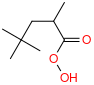

CC(C)=COO + [CH2]C(C)(C)OO <=> CC(C)([CH]OO)CC(C)(C)OO
CC(=COO)CC(C)(C)OO + [CH3] <=> CC(C)([CH]OO)CC(C)(C)OO
CC(C)(C=O)CC(C)(C)OO + [OH] <=> CC(C)([CH]OO)CC(C)(C)OO


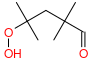

CC(C)=C(OO)C(C)(C)OO + [CH3] <=> CC(C)(C)[C](OO)C(C)(C)OO
CC(OO)=C(OO)C(C)(C)C + [CH3] <=> CC(C)(C)[C](OO)C(C)(C)OO
CC(C)(C)C(=O)C(C)(C)OO + [OH] <=> CC(C)(C)[C](OO)C(C)(C)OO


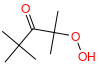

CC(C)=C(OO)C(C)(C)C + [O]O <=> CC(C)(C)[C](OO)C(C)(C)OO
CC(=COO)OO + [CH2]C(C)(C)C <=> CC(C)(C)CC(C)([CH]OO)OO
CC(C)(C)CC(=COO)OO + [CH3] <=> CC(C)(C)CC(C)([CH]OO)OO
CC(C)(C)CC(C)(C=O)OO + [OH] <=> CC(C)(C)CC(C)([CH]OO)OO


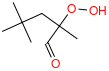

CC(=COO)CC(C)(C)C + [O]O <=> CC(C)(C)CC(C)([CH]OO)OO
CC(C)=COO + [CH2]C(C)COO <=> CC(COO)CC(C)(C)[CH]OO
CC(=COO)CC(C)COO + [CH3] <=> CC(COO)CC(C)(C)[CH]OO
CC(COO)CC(C)(C)C=O + [OH] <=> CC(COO)CC(C)(C)[CH]OO


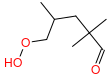

CC(=COO)CC(C)(C)COO + [H] <=> CC([CH]OO)CC(C)(C)COO
CC=COO + [CH2]C(C)(C)COO <=> CC([CH]OO)CC(C)(C)COO
CC(C)(CC=COO)COO + [CH3] <=> CC([CH]OO)CC(C)(C)COO
CC(C=O)CC(C)(C)COO + [OH] <=> CC([CH]OO)CC(C)(C)COO


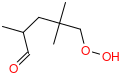

CC(COO)=C(OO)C(C)(C)C + [H] <=> CC(COO)[C](OO)C(C)(C)C
CC(C)=C(OO)C(C)COO + [CH3] <=> CC(COO)[C](OO)C(C)(C)C
CC=C(OO)C(C)(C)C + [CH2]OO <=> CC(COO)[C](OO)C(C)(C)C
CC(C)(C)C(=CCOO)OO + [CH3] <=> CC(COO)[C](OO)C(C)(C)C
CC(COO)C(=O)C(C)(C)C + [OH] <=> CC(COO)[C](OO)C(C)(C)C


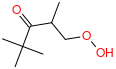

CC(=COO)C(OO)C(C)(C)C + [H] <=> CC([CH]OO)C(OO)C(C)(C)C
CC=COO + CC(C)(C)[CH]OO <=> CC([CH]OO)C(OO)C(C)(C)C
CC(C)(C)C(C=COO)OO + [CH3] <=> CC([CH]OO)C(OO)C(C)(C)C
CC(C=O)C(OO)C(C)(C)C + [OH] <=> CC([CH]OO)C(OO)C(C)(C)C


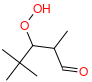

CC(C)=C(OO)OO + [CH2]C(C)C <=> CC(C)CC(C)(C)[C](OO)OO
CC(CC(C)C)=C(OO)OO + [CH3] <=> CC(C)CC(C)(C)[C](OO)OO
CC(C)CC(C)(C)C(=O)OO + [OH] <=> CC(C)CC(C)(C)[C](OO)OO


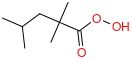

CC(C)=C(OO)C(C)(C)COO + [H] <=> CC(C)[C](OO)C(C)(C)COO
CC(C)=C(OO)C(C)C + [CH2]OO <=> CC(C)[C](OO)C(C)(C)COO
CC(COO)=C(OO)C(C)C + [CH3] <=> CC(C)[C](OO)C(C)(C)COO
CC=C(OO)C(C)(C)COO + [CH3] <=> CC(C)[C](OO)C(C)(C)COO
CC(C)C(=O)C(C)(C)COO + [OH] <=> CC(C)[C](OO)C(C)(C)COO


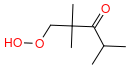

CC(C)=COO + CC(C)[CH]OO <=> CC(C)C(OO)C(C)(C)[CH]OO
CC(=COO)C(OO)C(C)C + [CH3] <=> CC(C)C(OO)C(C)(C)[CH]OO
CC(C)C(OO)C(C)(C)C=O + [OH] <=> CC(C)C(OO)C(C)(C)[CH]OO


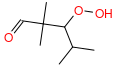

CC(=COO)COO + [CH2]C(C)C <=> CC(C)CC(C)([CH]OO)COO
CC(=COO)CC(C)C + [CH2]OO <=> CC(C)CC(C)([CH]OO)COO
CC(C)CC(=COO)COO + [CH3] <=> CC(C)CC(C)([CH]OO)COO
CC(C)CC(C)(C=O)COO + [OH] <=> CC(C)CC(C)([CH]OO)COO


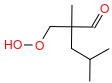

ketohydroperoxide


{Molecule(smiles="CC(C)C(=O)C(C)(C)COO"),
 Molecule(smiles="CC(C)C(OO)C(C)(C)C=O"),
 Molecule(smiles="CC(C)CC(C)(C=O)COO"),
 Molecule(smiles="CC(C)(C)CC(C=O)COO"),
 Molecule(smiles="CC(CC(C)(C)C)C(=O)OO"),
 Molecule(smiles="CC(C)(C)CC(C)(C=O)OO"),
 Molecule(smiles="CC(C)(C=O)CC(C)(C)OO"),
 Molecule(smiles="CC(C)(C)C(=O)C(C)(C)OO"),
 Molecule(smiles="CC(COO)CC(C)(C)C=O"),
 Molecule(smiles="CC(C=O)CC(C)(C)COO"),
 Molecule(smiles="CC(COO)C(=O)C(C)(C)C"),
 Molecule(smiles="CC(C=O)C(OO)C(C)(C)C"),
 Molecule(smiles="CC(C)CC(C)(C)C(=O)OO")}

In [22]:
# HOOQjOOH now beta scissions to OH + ketohydroperoxide
print("Applying R_Addition_MultipleBond to HOOQjOOH to find its Beta Scission products")
for s in molecules['HOOQjOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='R_Addition_MultipleBond')
    for r in reactions:
        print(r)
        r1 = r.reactants[0].molecule[0]
        r2 = r.reactants[1].molecule[0]
        if r2.get_formula() == 'HO':
            display(r1)
            molecules['ketohydroperoxide'].add(r1)

print('ketohydroperoxide')
molecules['ketohydroperoxide']

[OH] + CC(C)C(=O)C(C)(C)C[O] <=> CC(C)C(=O)C(C)(C)COO


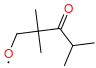

[O]O + [CH2]C(C)(C)C(=O)C(C)C <=> CC(C)C(=O)C(C)(C)COO
[H] + CC(C)C(=O)C(C)(C)CO[O] <=> CC(C)C(=O)C(C)(C)COO
[CH2]OO + C[C](C)C(=O)C(C)C <=> CC(C)C(=O)C(C)(C)COO
C[C](COO)C(=O)C(C)C + [CH3] <=> CC(C)C(=O)C(C)(C)COO
C[C](C)COO + CC(C)[C]=O <=> CC(C)C(=O)C(C)(C)COO
C[CH]C(=O)C(C)(C)COO + [CH3] <=> CC(C)C(=O)C(C)(C)COO
CC(C)([C]=O)COO + C[CH]C <=> CC(C)C(=O)C(C)(C)COO
C[C](C)C(=O)C(C)(C)COO + [H] <=> CC(C)C(=O)C(C)(C)COO
CC(C)C(=O)C(C)(C)[CH]OO + [H] <=> CC(C)C(=O)C(C)(C)COO
[CH2]C(C)(COO)C(=O)C(C)C + [H] <=> CC(C)C(=O)C(C)(C)COO
[CH2]C(C)C(=O)C(C)(C)COO + [H] <=> CC(C)C(=O)C(C)(C)COO
[OH] + CC(C)C([O])C(C)(C)C=O <=> CC(C)C(OO)C(C)(C)C=O


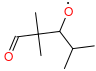

[O]O + CC(C)[CH]C(C)(C)C=O <=> CC(C)C(OO)C(C)(C)C=O
[H] + CC(C)C(O[O])C(C)(C)C=O <=> CC(C)C(OO)C(C)(C)C=O
CC(C)[CH]OO + C[C](C)C=O <=> CC(C)C(OO)C(C)(C)C=O
C[C](C=O)C(OO)C(C)C + [CH3] <=> CC(C)C(OO)C(C)(C)C=O
C[C](C)C(OO)C(C)C + [CH]=O <=> CC(C)C(OO)C(C)(C)C=O
CC(C)([CH]OO)C=O + C[CH]C <=> CC(C)C(OO)C(C)(C)C=O
C[CH]C(OO)C(C)(C)C=O + [CH3] <=> CC(C)C(OO)C(C)(C)C=O
C[C](C)C(OO)C(C)(C)C=O + [H] <=> CC(C)C(OO)C(C)(C)C=O
CC(C)[C](OO)C(C)(C)C=O + [H] <=> CC(C)C(OO)C(C)(C)C=O
[CH2]C(C)(C=O)C(OO)C(C)C + [H] <=> CC(C)C(OO)C(C)(C)C=O
[CH2]C(C)C(OO)C(C)(C)C=O + [H] <=> CC(C)C(OO)C(C)(C)C=O
CC(C)C(OO)C(C)(C)[C]=O + [H] <=> CC(C)C(OO)C(C)(C)C=O
[OH] + CC(C)CC(C)(C=O)C[O] <=> CC(C)CC(C)(C=O)COO


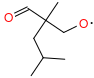

[O]O + [CH2]C(C)(C=O)CC(C)C <=> CC(C)CC(C)(C=O)COO
[H] + CC(C)CC(C)(C=O)CO[O] <=> CC(C)CC(C)(C=O)COO
C[C](C=O)COO + [CH2]C(C)C <=> CC(C)CC(C)(C=O)COO
[CH2]OO + C[C](C=O)CC(C)C <=> CC(C)CC(C)(C=O)COO
CC(C)C[C](C=O)COO + [CH3] <=> CC(C)CC(C)(C=O)COO
C[C](COO)CC(C)C + [CH]=O <=> CC(C)CC(C)(C=O)COO
[CH2]C(C)(C=O)COO + C[CH]C <=> CC(C)CC(C)(C=O)COO
C[CH]CC(C)(C=O)COO + [CH3] <=> CC(C)CC(C)(C=O)COO
C[C](C)CC(C)(C=O)COO + [H] <=> CC(C)CC(C)(C=O)COO
CC(C)[CH]C(C)(C=O)COO + [H] <=> CC(C)CC(C)(C=O)COO
CC(C)CC(C)([CH]OO)C=O + [H] <=> CC(C)CC(C)(C=O)COO
[CH2]C(C=O)(COO)CC(C)C + [H] <=> CC(C)CC(C)(C=O)COO
[CH2]C(C)CC(C)(C=O)COO + [H] <=> CC(C)CC(C)(C=O)COO
CC(C)CC(C)([C]=O)COO + [H] <=> CC(C)CC(C)(C=O)COO
[OH] + CC(C)(C)CC(C=O)C[O] <=> CC(C)(C)CC(C=O)COO


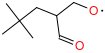

[O]O + [CH2]C(C=O)CC(C)(C)C <=> CC(C)(C)CC(C=O)COO
[H] + CC(C)(C)CC(C=O)CO[O] <=> CC(C)(C)CC(C=O)COO
[CH2]C(C=O)COO + C[C](C)C <=> CC(C)(C)CC(C=O)COO
C[C](C)CC(C=O)COO + [CH3] <=> CC(C)(C)CC(C=O)COO
O=C[CH]COO + [CH2]C(C)(C)C <=> CC(C)(C)CC(C=O)COO
[CH2]OO + CC(C)(C)C[CH]C=O <=> CC(C)(C)CC(C=O)COO
CC(C)(C)C[CH]COO + [CH]=O <=> CC(C)(C)CC(C=O)COO
CC(C)(C)C[C](C=O)COO + [H] <=> CC(C)(C)CC(C=O)COO
CC(C)(C)[CH]C(C=O)COO + [H] <=> CC(C)(C)CC(C=O)COO
CC(C)(C)CC([CH]OO)C=O + [H] <=> CC(C)(C)CC(C=O)COO
[CH2]C(C)(C)CC(C=O)COO + [H] <=> CC(C)(C)CC(C=O)COO
CC(C)(C)CC([C]=O)COO + [H] <=> CC(C)(C)CC(C=O)COO
[OH] + CC(CC(C)(C)C)C([O])=O <=> CC(CC(C)(C)C)C(=O)OO


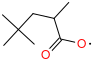

[O]O + CC([C]=O)CC(C)(C)C <=> CC(CC(C)(C)C)C(=O)OO
[H] + CC(CC(C)(C)C)C(=O)O[O] <=> CC(CC(C)(C)C)C(=O)OO
[CH2]C(C)C(=O)OO + C[C](C)C <=> CC(CC(C)(C)C)C(=O)OO
C[C](C)CC(C)C(=O)OO + [CH3] <=> CC(CC(C)(C)C)C(=O)OO
C[CH]C(=O)OO + [CH2]C(C)(C)C <=> CC(CC(C)(C)C)C(=O)OO
CC(C)(C)C[CH]C(=O)OO + [CH3] <=> CC(CC(C)(C)C)C(=O)OO
O=[C]OO + C[CH]CC(C)(C)C <=> CC(CC(C)(C)C)C(=O)OO
C[C](CC(C)(C)C)C(=O)OO + [H] <=> CC(CC(C)(C)C)C(=O)OO
CC([CH]C(C)(C)C)C(=O)OO + [H] <=> CC(CC(C)(C)C)C(=O)OO
[CH2]C(C)(C)CC(C)C(=O)OO + [H] <=> CC(CC(C)(C)C)C(=O)OO
[CH2]C(CC(C)(C)C)C(=O)OO + [H] <=> CC(CC(C)(C)C)C(=O)OO
[OH] + CC(C)(C)CC(C)([O])C=O <=> CC(C)(C)CC(C)(C=O)OO


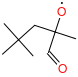

[O]O + C[C](C=O)CC(C)(C)C <=> CC(C)(C)CC(C)(C=O)OO
[H] + CC(C)(C)CC(C)(C=O)O[O] <=> CC(C)(C)CC(C)(C=O)OO
[CH2]C(C)(C=O)OO + C[C](C)C <=> CC(C)(C)CC(C)(C=O)OO
C[C](C)CC(C)(C=O)OO + [CH3] <=> CC(C)(C)CC(C)(C=O)OO
C[C](C=O)OO + [CH2]C(C)(C)C <=> CC(C)(C)CC(C)(C=O)OO
CC(C)(C)C[C](C=O)OO + [CH3] <=> CC(C)(C)CC(C)(C=O)OO
C[C](CC(C)(C)C)OO + [CH]=O <=> CC(C)(C)CC(C)(C=O)OO
CC(C)(C)[CH]C(C)(C=O)OO + [H] <=> CC(C)(C)CC(C)(C=O)OO
[CH2]C(C)(C)CC(C)(C=O)OO + [H] <=> CC(C)(C)CC(C)(C=O)OO
[CH2]C(C=O)(CC(C)(C)C)OO + [H] <=> CC(C)(C)CC(C)(C=O)OO
CC(C)(C)CC(C)([C]=O)OO + [H] <=> CC(C)(C)CC(C)(C=O)OO
[OH] + CC(C)([O])CC(C)(C)C=O <=> CC(C)(C=O)CC(C)(C)OO


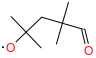

[O]O + C[C](C)CC(C)(C)C=O <=> CC(C)(C=O)CC(C)(C)OO
[H] + CC(C)(C=O)CC(C)(C)O[O] <=> CC(C)(C=O)CC(C)(C)OO
[CH2]C(C)(C)OO + C[C](C)C=O <=> CC(C)(C=O)CC(C)(C)OO
C[C](C=O)CC(C)(C)OO + [CH3] <=> CC(C)(C=O)CC(C)(C)OO
C[C](C)CC(C)(C)OO + [CH]=O <=> CC(C)(C=O)CC(C)(C)OO
C[C](C)OO + [CH2]C(C)(C)C=O <=> CC(C)(C=O)CC(C)(C)OO
C[C](CC(C)(C)C=O)OO + [CH3] <=> CC(C)(C=O)CC(C)(C)OO
CC(C)([CH]C(C)(C)OO)C=O + [H] <=> CC(C)(C=O)CC(C)(C)OO
[CH2]C(C)(C=O)CC(C)(C)OO + [H] <=> CC(C)(C=O)CC(C)(C)OO
[CH2]C(C)(CC(C)(C)C=O)OO + [H] <=> CC(C)(C=O)CC(C)(C)OO
CC(C)([C]=O)CC(C)(C)OO + [H] <=> CC(C)(C=O)CC(C)(C)OO
[OH] + CC(C)(C)C(=O)C(C)(C)[O] <=> CC(C)(C)C(=O)C(C)(C)OO


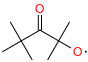

[O]O + C[C](C)C(=O)C(C)(C)C <=> CC(C)(C)C(=O)C(C)(C)OO
[H] + CC(C)(C)C(=O)C(C)(C)O[O] <=> CC(C)(C)C(=O)C(C)(C)OO
C[C](C)C(=O)C(C)(C)OO + [CH3] <=> CC(C)(C)C(=O)C(C)(C)OO
CC(C)([C]=O)OO + C[C](C)C <=> CC(C)(C)C(=O)C(C)(C)OO
C[C](OO)C(=O)C(C)(C)C + [CH3] <=> CC(C)(C)C(=O)C(C)(C)OO
C[C](C)OO + CC(C)(C)[C]=O <=> CC(C)(C)C(=O)C(C)(C)OO
[CH2]C(C)(C)C(=O)C(C)(C)OO + [H] <=> CC(C)(C)C(=O)C(C)(C)OO
[CH2]C(C)(OO)C(=O)C(C)(C)C + [H] <=> CC(C)(C)C(=O)C(C)(C)OO
[OH] + CC(C[O])CC(C)(C)C=O <=> CC(COO)CC(C)(C)C=O


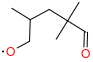

[O]O + [CH2]C(C)CC(C)(C)C=O <=> CC(COO)CC(C)(C)C=O
[H] + CC(CO[O])CC(C)(C)C=O <=> CC(COO)CC(C)(C)C=O
[CH2]C(C)COO + C[C](C)C=O <=> CC(COO)CC(C)(C)C=O
C[C](C=O)CC(C)COO + [CH3] <=> CC(COO)CC(C)(C)C=O
C[C](C)CC(C)COO + [CH]=O <=> CC(COO)CC(C)(C)C=O
C[CH]COO + [CH2]C(C)(C)C=O <=> CC(COO)CC(C)(C)C=O
[CH2]OO + C[CH]CC(C)(C)C=O <=> CC(COO)CC(C)(C)C=O
CC(C)(C=O)C[CH]COO + [CH3] <=> CC(COO)CC(C)(C)C=O
C[C](COO)CC(C)(C)C=O + [H] <=> CC(COO)CC(C)(C)C=O
CC([CH]C(C)(C)C=O)COO + [H] <=> CC(COO)CC(C)(C)C=O
CC([CH]OO)CC(C)(C)C=O + [H] <=> CC(COO)CC(C)(C)C=O
[CH2]C(C)(C=O)CC(C)COO + [H] <=> CC(COO)CC(C)(C)C=O
[CH2]C(COO)CC(C)(C)C=O + [H] <=> CC(COO)CC(C)(C)C=O
CC(COO)CC(C)(C)[C]=O + [H] <=> CC(COO)CC(C)(C)C=O
[OH] + CC(C=O)CC(C)(C)C[O] <=> CC(C=O)CC(C)(C)COO


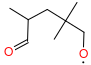

[O]O + [CH2]C(C)(C)CC(C)C=O <=> CC(C=O)CC(C)(C)COO
[H] + CC(C=O)CC(C)(C)CO[O] <=> CC(C=O)CC(C)(C)COO
C[C](C)COO + [CH2]C(C)C=O <=> CC(C=O)CC(C)(C)COO
[CH2]OO + C[C](C)CC(C)C=O <=> CC(C=O)CC(C)(C)COO
C[C](COO)CC(C)C=O + [CH3] <=> CC(C=O)CC(C)(C)COO
[CH2]C(C)(C)COO + C[CH]C=O <=> CC(C=O)CC(C)(C)COO
CC(C)(C[CH]C=O)COO + [CH3] <=> CC(C=O)CC(C)(C)COO
C[CH]CC(C)(C)COO + [CH]=O <=> CC(C=O)CC(C)(C)COO
C[C](C=O)CC(C)(C)COO + [H] <=> CC(C=O)CC(C)(C)COO
CC([CH]C(C)(C)COO)C=O + [H] <=> CC(C=O)CC(C)(C)COO
CC(C=O)CC(C)(C)[CH]OO + [H] <=> CC(C=O)CC(C)(C)COO
[CH2]C(C)(COO)CC(C)C=O + [H] <=> CC(C=O)CC(C)(C)COO
[CH2]C(C=O)CC(C)(C)COO + [H] <=> CC(C=O)CC(C)(C)COO
CC([C]=O)CC(C)(C)COO + [H] <=> CC(C=O)CC(C)(C)COO
[OH] + CC(C[O])C(=O)C(C)(C)C <=> CC(COO)C(=O)C(C)(C)C


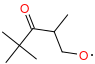

[O]O + [CH2]C(C)C(=O)C(C)(C)C <=> CC(COO)C(=O)C(C)(C)C
[H] + CC(CO[O])C(=O)C(C)(C)C <=> CC(COO)C(=O)C(C)(C)C
C[C](C)C(=O)C(C)COO + [CH3] <=> CC(COO)C(=O)C(C)(C)C
CC([C]=O)COO + C[C](C)C <=> CC(COO)C(=O)C(C)(C)C
[CH2]OO + C[CH]C(=O)C(C)(C)C <=> CC(COO)C(=O)C(C)(C)C
CC(C)(C)C(=O)[CH]COO + [CH3] <=> CC(COO)C(=O)C(C)(C)C
C[CH]COO + CC(C)(C)[C]=O <=> CC(COO)C(=O)C(C)(C)C
C[C](COO)C(=O)C(C)(C)C + [H] <=> CC(COO)C(=O)C(C)(C)C
CC([CH]OO)C(=O)C(C)(C)C + [H] <=> CC(COO)C(=O)C(C)(C)C
[CH2]C(C)(C)C(=O)C(C)COO + [H] <=> CC(COO)C(=O)C(C)(C)C
[CH2]C(COO)C(=O)C(C)(C)C + [H] <=> CC(COO)C(=O)C(C)(C)C
[OH] + CC(C=O)C([O])C(C)(C)C <=> CC(C=O)C(OO)C(C)(C)C


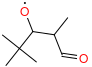

[O]O + CC([CH]C(C)(C)C)C=O <=> CC(C=O)C(OO)C(C)(C)C
[H] + CC(C=O)C(O[O])C(C)(C)C <=> CC(C=O)C(OO)C(C)(C)C
CC([CH]OO)C=O + C[C](C)C <=> CC(C=O)C(OO)C(C)(C)C
C[C](C)C(OO)C(C)C=O + [CH3] <=> CC(C=O)C(OO)C(C)(C)C
CC(C)(C)[CH]OO + C[CH]C=O <=> CC(C=O)C(OO)C(C)(C)C
CC(C)(C)C([CH]C=O)OO + [CH3] <=> CC(C=O)C(OO)C(C)(C)C
C[CH]C(OO)C(C)(C)C + [CH]=O <=> CC(C=O)C(OO)C(C)(C)C
C[C](C=O)C(OO)C(C)(C)C + [H] <=> CC(C=O)C(OO)C(C)(C)C
CC(C=O)[C](OO)C(C)(C)C + [H] <=> CC(C=O)C(OO)C(C)(C)C
[CH2]C(C)(C)C(OO)C(C)C=O + [H] <=> CC(C=O)C(OO)C(C)(C)C
[CH2]C(C=O)C(OO)C(C)(C)C + [H] <=> CC(C=O)C(OO)C(C)(C)C
CC([C]=O)C(OO)C(C)(C)C + [H] <=> CC(C=O)C(OO)C(C)(C)C
[OH] + CC(C)CC(C)(C)C([O])=O <=> CC(C)CC(C)(C)C(=O)OO


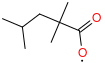

[O]O + CC(C)CC(C)(C)[C]=O <=> CC(C)CC(C)(C)C(=O)OO
[H] + CC(C)CC(C)(C)C(=O)O[O] <=> CC(C)CC(C)(C)C(=O)OO
C[C](C)C(=O)OO + [CH2]C(C)C <=> CC(C)CC(C)(C)C(=O)OO
C[C](CC(C)C)C(=O)OO + [CH3] <=> CC(C)CC(C)(C)C(=O)OO
O=[C]OO + C[C](C)CC(C)C <=> CC(C)CC(C)(C)C(=O)OO
[CH2]C(C)(C)C(=O)OO + C[CH]C <=> CC(C)CC(C)(C)C(=O)OO
C[CH]CC(C)(C)C(=O)OO + [CH3] <=> CC(C)CC(C)(C)C(=O)OO
C[C](C)CC(C)(C)C(=O)OO + [H] <=> CC(C)CC(C)(C)C(=O)OO
CC(C)[CH]C(C)(C)C(=O)OO + [H] <=> CC(C)CC(C)(C)C(=O)OO
[CH2]C(C)(CC(C)C)C(=O)OO + [H] <=> CC(C)CC(C)(C)C(=O)OO
[CH2]C(C)CC(C)(C)C(=O)OO + [H] <=> CC(C)CC(C)(C)C(=O)OO


{Molecule(smiles="CC(C)C([O])C(C)(C)C=O"),
 Molecule(smiles="CC(C)CC(C)(C=O)C[O]"),
 Molecule(smiles="CC(C)(C)CC(C=O)C[O]"),
 Molecule(smiles="CC(CC(C)(C)C)C([O])=O"),
 Molecule(smiles="CC(C)C(=O)C(C)(C)C[O]"),
 Molecule(smiles="CC(C)(C)CC(C)([O])C=O"),
 Molecule(smiles="CC(C)([O])CC(C)(C)C=O"),
 Molecule(smiles="CC(C)(C)C(=O)C(C)(C)[O]"),
 Molecule(smiles="CC(C[O])CC(C)(C)C=O"),
 Molecule(smiles="CC(C=O)CC(C)(C)C[O]"),
 Molecule(smiles="CC(C[O])C(=O)C(C)(C)C"),
 Molecule(smiles="CC(C=O)C([O])C(C)(C)C"),
 Molecule(smiles="CC(C)CC(C)(C)C([O])=O")}

In [23]:
# The ketohydroperoxide can now break its O-OH and form an alkoxy radical
for s in molecules['ketohydroperoxide']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m1 = r.reactants[0].molecule[0]
        m2 = r.reactants[1].molecule[0]
        if m1.get_formula() == 'HO':
            display(m2)
            molecules['alkoxy_radical'].add(m2)
            molecules['OH'].add(m1)
        if m2.get_formula() == 'HO':
            display(m1)
            molecules['alkoxy_radical'].add(m1)
            molecules['OH'].add(m2)
molecules['alkoxy_radical']

Applying HO2_Elimination_from_PeroxyRadical
CC(CC(C)(C)C)C(O[O])OO <=> CC(=COO)CC(C)(C)C + [O]O


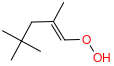

CC(C)(C)CC(CO[O])COO <=> C=C(COO)CC(C)(C)C + [O]O


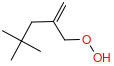

CC(C)(C)CC(C)(COO)O[O] <=> CC(=CC(C)(C)C)COO + [O]O


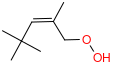

CC(C)(C)CC(C)(COO)O[O] <=> CC(=COO)CC(C)(C)C + [O]O


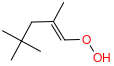

CC(C)(C)CC(C)(COO)O[O] <=> C=C(COO)CC(C)(C)C + [O]O


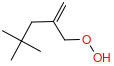

CC(COO)C(O[O])C(C)(C)C <=> CC(=CC(C)(C)C)COO + [O]O


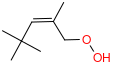

CC(C)C(O[O])C(C)(C)COO <=> CC(C)=CC(C)(C)COO + [O]O


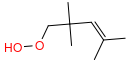

CC(C)(COO)CC(C)(C)O[O] <=> CC(C)=CC(C)(C)COO + [O]O


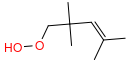

CC(C)(COO)CC(C)(C)O[O] <=> C=C(C)CC(C)(C)COO + [O]O


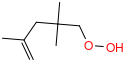

CC(CO[O])CC(C)(C)COO <=> C=C(C)CC(C)(C)COO + [O]O


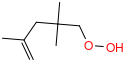

CC(C)C(O[O])(OO)C(C)(C)C <=> CC(C)=C(OO)C(C)(C)C + [O]O


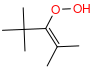

CC(C)(C)C(OO)C(C)(C)O[O] <=> CC(C)=C(OO)C(C)(C)C + [O]O


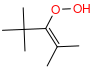

CC(C)(C)C(OO)C(C)(C)O[O] <=> C=C(C)C(OO)C(C)(C)C + [O]O


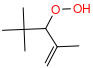

CC(CO[O])C(OO)C(C)(C)C <=> C=C(C)C(OO)C(C)(C)C + [O]O


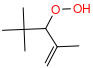

QeneOOH


{Molecule(smiles="CC(=CC(C)(C)C)COO"),
 Molecule(smiles="CC(=COO)CC(C)(C)C"),
 Molecule(smiles="CC(C)=CC(C)(C)COO"),
 Molecule(smiles="C=C(C)CC(C)(C)COO"),
 Molecule(smiles="C=C(COO)CC(C)(C)C"),
 Molecule(smiles="CC(C)=C(OO)C(C)(C)C"),
 Molecule(smiles="C=C(C)C(OO)C(C)(C)C")}

In [24]:
# HO2_Elimination_from_PeroxyRadical applied to QOOH makes an Alkene-OOH
print("Applying HO2_Elimination_from_PeroxyRadical")
for s in molecules['O2QOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families(
        (s,), only_families='HO2_Elimination_from_PeroxyRadical')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['QeneOOH'].add(m)
print('QeneOOH')
molecules['QeneOOH']

[H] + CC(CO[O])CC(C)(C)C <=> CC(COO)CC(C)(C)C


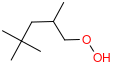

[H] + CC(C)CC(C)(C)CO[O] <=> CC(C)CC(C)(C)COO


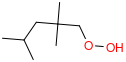

[H] + CC(C)C(O[O])C(C)(C)C <=> CC(C)C(OO)C(C)(C)C


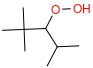

[H] + CC(C)(C)CC(C)(C)O[O] <=> CC(C)(C)CC(C)(C)OO


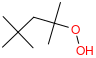

ROOH


{Molecule(smiles="CC(C)(C)CC(C)(C)OO"),
 Molecule(smiles="CC(C)CC(C)(C)COO"),
 Molecule(smiles="CC(COO)CC(C)(C)C"),
 Molecule(smiles="CC(C)C(OO)C(C)(C)C")}

In [25]:
# Another chain-brainching route.
# Add H to RO2 to make ROOH (which in the next cell becomes RO and OH)
# This would happen by abstracting an H from some fuel, but 
# here we can make the same species by just adding an H atom.
h = list(molecules['H'])[0]
for s in molecules['ROO']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,h), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        molecules['ROOH'].add(m)
print('ROOH')
molecules['ROOH']

[OH] + CC(C)(C)CC(C)(C)[O] <=> CC(C)(C)CC(C)(C)OO


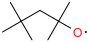

[O]O + C[C](C)CC(C)(C)C <=> CC(C)(C)CC(C)(C)OO
[H] + CC(C)(C)CC(C)(C)O[O] <=> CC(C)(C)CC(C)(C)OO
[CH2]C(C)(C)OO + C[C](C)C <=> CC(C)(C)CC(C)(C)OO
C[C](C)CC(C)(C)OO + [CH3] <=> CC(C)(C)CC(C)(C)OO
C[C](C)OO + [CH2]C(C)(C)C <=> CC(C)(C)CC(C)(C)OO
C[C](CC(C)(C)C)OO + [CH3] <=> CC(C)(C)CC(C)(C)OO
CC(C)(C)[CH]C(C)(C)OO + [H] <=> CC(C)(C)CC(C)(C)OO
[CH2]C(C)(C)CC(C)(C)OO + [H] <=> CC(C)(C)CC(C)(C)OO
[CH2]C(C)(CC(C)(C)C)OO + [H] <=> CC(C)(C)CC(C)(C)OO
[OH] + CC(C)CC(C)(C)C[O] <=> CC(C)CC(C)(C)COO


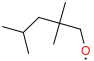

[O]O + [CH2]C(C)(C)CC(C)C <=> CC(C)CC(C)(C)COO
[H] + CC(C)CC(C)(C)CO[O] <=> CC(C)CC(C)(C)COO
C[C](C)COO + [CH2]C(C)C <=> CC(C)CC(C)(C)COO
[CH2]OO + C[C](C)CC(C)C <=> CC(C)CC(C)(C)COO
C[C](COO)CC(C)C + [CH3] <=> CC(C)CC(C)(C)COO
[CH2]C(C)(C)COO + C[CH]C <=> CC(C)CC(C)(C)COO
C[CH]CC(C)(C)COO + [CH3] <=> CC(C)CC(C)(C)COO
C[C](C)CC(C)(C)COO + [H] <=> CC(C)CC(C)(C)COO
CC(C)[CH]C(C)(C)COO + [H] <=> CC(C)CC(C)(C)COO
CC(C)CC(C)(C)[CH]OO + [H] <=> CC(C)CC(C)(C)COO
[CH2]C(C)(COO)CC(C)C + [H] <=> CC(C)CC(C)(C)COO
[CH2]C(C)CC(C)(C)COO + [H] <=> CC(C)CC(C)(C)COO
[OH] + CC(C[O])CC(C)(C)C <=> CC(COO)CC(C)(C)C


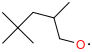

[O]O + [CH2]C(C)CC(C)(C)C <=> CC(COO)CC(C)(C)C
[H] + CC(CO[O])CC(C)(C)C <=> CC(COO)CC(C)(C)C
[CH2]C(C)COO + C[C](C)C <=> CC(COO)CC(C)(C)C
C[C](C)CC(C)COO + [CH3] <=> CC(COO)CC(C)(C)C
C[CH]COO + [CH2]C(C)(C)C <=> CC(COO)CC(C)(C)C
[CH2]OO + C[CH]CC(C)(C)C <=> CC(COO)CC(C)(C)C
CC(C)(C)C[CH]COO + [CH3] <=> CC(COO)CC(C)(C)C
C[C](COO)CC(C)(C)C + [H] <=> CC(COO)CC(C)(C)C
CC([CH]C(C)(C)C)COO + [H] <=> CC(COO)CC(C)(C)C
CC([CH]OO)CC(C)(C)C + [H] <=> CC(COO)CC(C)(C)C
[CH2]C(C)(C)CC(C)COO + [H] <=> CC(COO)CC(C)(C)C
[CH2]C(COO)CC(C)(C)C + [H] <=> CC(COO)CC(C)(C)C
[OH] + CC(C)C([O])C(C)(C)C <=> CC(C)C(OO)C(C)(C)C


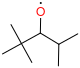

[O]O + CC(C)[CH]C(C)(C)C <=> CC(C)C(OO)C(C)(C)C
[H] + CC(C)C(O[O])C(C)(C)C <=> CC(C)C(OO)C(C)(C)C
CC(C)[CH]OO + C[C](C)C <=> CC(C)C(OO)C(C)(C)C
C[C](C)C(OO)C(C)C + [CH3] <=> CC(C)C(OO)C(C)(C)C
CC(C)(C)[CH]OO + C[CH]C <=> CC(C)C(OO)C(C)(C)C
C[CH]C(OO)C(C)(C)C + [CH3] <=> CC(C)C(OO)C(C)(C)C
C[C](C)C(OO)C(C)(C)C + [H] <=> CC(C)C(OO)C(C)(C)C
CC(C)[C](OO)C(C)(C)C + [H] <=> CC(C)C(OO)C(C)(C)C
[CH2]C(C)(C)C(OO)C(C)C + [H] <=> CC(C)C(OO)C(C)(C)C
[CH2]C(C)C(OO)C(C)(C)C + [H] <=> CC(C)C(OO)C(C)(C)C


RO


{Molecule(smiles="CC(C)CC(C)(C)C[O]"),
 Molecule(smiles="CC(C)(C)CC(C)(C)[O]"),
 Molecule(smiles="CC(C[O])CC(C)(C)C"),
 Molecule(smiles="CC(C)C([O])C(C)(C)C")}

In [26]:
# The ROOH then becomes RO and OH which is chain-brainching
for s in molecules['ROOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='R_Recombination')
    for r in reactions:
        print(r)
        m1 = r.reactants[0].molecule[0]
        m2 = r.reactants[1].molecule[0]
        
        if m1.get_formula() == 'HO':
            display(m2)
            molecules['RO'].add(m2)
            molecules['OH'].add(m1)
        if m2.get_formula() == 'HO':
            display(m1)
            molecules['RO'].add(m1)
            molecules['OH'].add(m2)

print("\n\nRO")
molecules['RO']

Applying intra_OH_migration to QOOH
CC(C)(C)[CH]C(C)(C)OO <=> CC(C)(C)C(O)C(C)(C)[O]


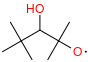

[CH2]C(C)(CC(C)(C)C)OO <=> CC(C)(C)CC(C)([O])CO


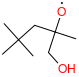

[CH2]C(C)(C)CC(C)(C)OO <=> CC(C)([O])CC(C)(C)CO


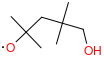

[CH2]C(COO)CC(C)(C)C <=> CC(C)(C)CC(C[O])CO


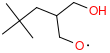

CC([CH]OO)CC(C)(C)C <=> CC(CC(C)(C)C)C([O])O


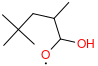

C[C](COO)CC(C)(C)C <=> CC(C)(C)CC(C)(O)C[O]


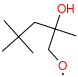

CC([CH]C(C)(C)C)COO <=> CC(C[O])C(O)C(C)(C)C


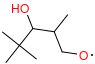

CC(C)CC(C)(C)[CH]OO <=> CC(C)CC(C)(C)C([O])O


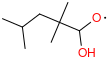

CC(C)[CH]C(C)(C)COO <=> CC(C)C(O)C(C)(C)C[O]


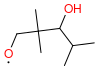

[CH2]C(C)(COO)CC(C)C <=> CC(C)CC(C)(C[O])CO


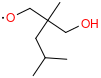

C[C](C)CC(C)(C)COO <=> CC(C)(O)CC(C)(C)C[O]


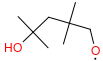

CC(C)[C](OO)C(C)(C)C <=> CC(C)C([O])(O)C(C)(C)C


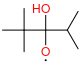

C[C](C)C(OO)C(C)(C)C <=> CC(C)(C)C([O])C(C)(C)O


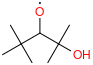

[CH2]C(C)(C)C(OO)C(C)C <=> CC(C)C([O])C(C)(C)CO


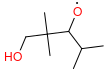

[CH2]C(C)C(OO)C(C)(C)C <=> CC(CO)C([O])C(C)(C)C


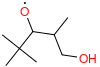

In [27]:
# intra_OH_migration can happen to QOOH
# Not sure it's helpful for low-T chemistry
# So we won't actually save them, but this is what they'd look like
print("Applying intra_OH_migration to QOOH")
for s in molecules['QOOH']:
    reactions = rmg.database.kinetics.generate_reactions_from_families((s,), only_families='intra_OH_migration')
    for r in reactions:
        print(r)
        m = r.products[0].molecule[0]
        display(m)
        # molecules['weird'].add(m)

In [28]:
# Here is what we've made
molecules

defaultdict(set,
            {'fuel': {Molecule(smiles="CC(C)CC(C)(C)C")},
             'H': {Molecule(smiles="[H]")},
             'R': {Molecule(smiles="[CH2]C(C)(C)CC(C)C"),
              Molecule(smiles="CC(C)[CH]C(C)(C)C"),
              Molecule(smiles="C[C](C)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)CC(C)(C)C")},
             'O2': {Molecule(smiles="[O][O]")},
             'ROO': {Molecule(smiles="CC(CO[O])CC(C)(C)C"),
              Molecule(smiles="CC(C)CC(C)(C)CO[O]"),
              Molecule(smiles="CC(C)C(O[O])C(C)(C)C"),
              Molecule(smiles="CC(C)(C)CC(C)(C)O[O]")},
             'QOOH': {Molecule(smiles="CC(C)(C)[CH]C(C)(C)OO"),
              Molecule(smiles="[CH2]C(C)(CC(C)(C)C)OO"),
              Molecule(smiles="[CH2]C(C)(C)CC(C)(C)OO"),
              Molecule(smiles="[CH2]C(COO)CC(C)(C)C"),
              Molecule(smiles="CC([CH]OO)CC(C)(C)C"),
              Molecule(smiles="C[C](COO)CC(C)(C)C"),
              Molecule(smiles="[CH2]C(C)(C)CC(C)COO"),

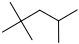

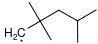

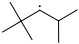

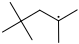

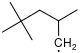

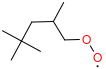

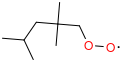

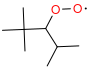

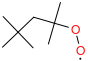

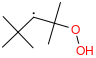

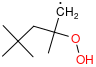

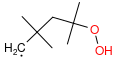

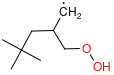

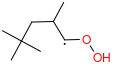

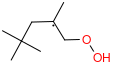

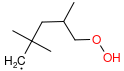

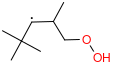

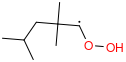

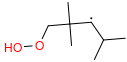

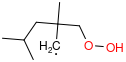

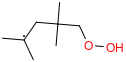

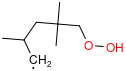

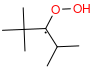

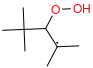

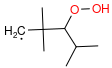

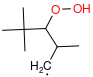

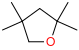

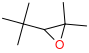

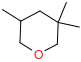

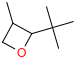

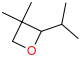

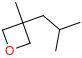

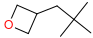

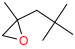

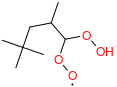

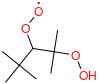

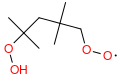

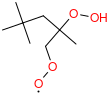

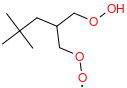

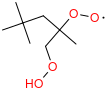

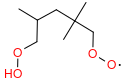

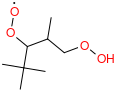

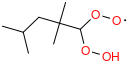

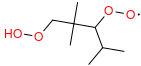

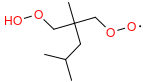

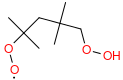

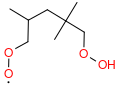

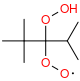

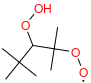

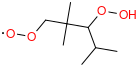

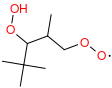

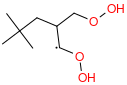

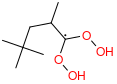

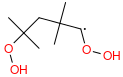

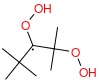

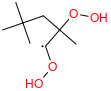

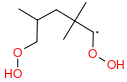

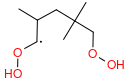

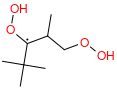

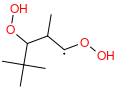

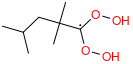

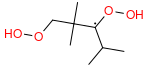

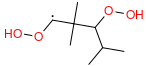

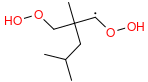

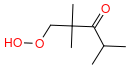

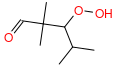

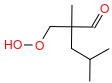

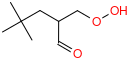

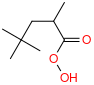

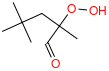

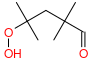

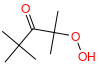

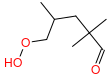

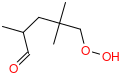

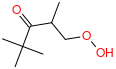

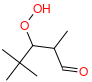

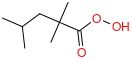

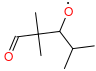

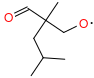

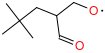

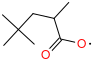

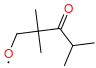

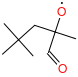

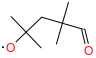

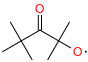

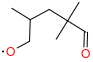

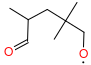

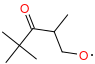

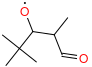

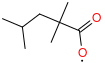

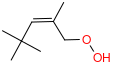

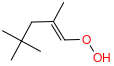

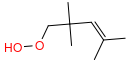

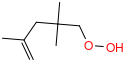

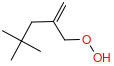

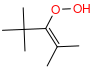

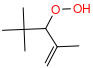

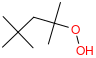

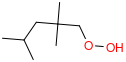

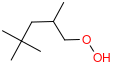

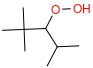

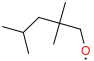

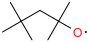

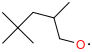

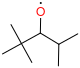

In [29]:
_=[ display(m) for s in molecules.values() for m in s]

In [30]:
molecules.keys()

dict_keys(['fuel', 'H', 'R', 'O2', 'ROO', 'QOOH', 'cyQO', 'O2QOOH', 'HOOQjOOH', 'ketohydroperoxide', 'alkoxy_radical', 'OH', 'QeneOOH', 'ROOH', 'RO'])

In [31]:
import datetime
datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2020-02-18 13:12:57'

In [32]:

# Print them out for an RMG input file

print(f"""
######################################
# RMG input file species block
# Generated on {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
# to help discover the low temperature combustion of:
#   {', '.join([m.to_smiles() for m in molecules['fuel']])}
######################################
""")

special = 'OH H O2'.split()

print('#'*30)
print(f'# Small molecules')
for name in special:
    mols = molecules[name]
    for i, m in enumerate(mols):
        print(f"species(label='{name}', reactive=True, structure=SMILES('{m.to_smiles()}'))")
        
for name,mols in molecules.items():
    
    if name in special:
        continue
    
    print('#'*30)
    print(f'# {name}')
    for i,m in enumerate(mols):
        print(f"species(label='{name}_{i+1}', reactive=True, structure=SMILES('{m.to_smiles()}'))")
    


######################################
# RMG input file species block
# Generated on 2020-02-18 13:13:05
# to help discover the low temperature combustion of:
#   CC(C)CC(C)(C)C
######################################

##############################
# Small molecules
species(label='OH', reactive=True, structure=SMILES('[OH]'))
species(label='H', reactive=True, structure=SMILES('[H]'))
species(label='O2', reactive=True, structure=SMILES('[O][O]'))
##############################
# fuel
species(label='fuel_1', reactive=True, structure=SMILES('CC(C)CC(C)(C)C'))
##############################
# R
species(label='R_1', reactive=True, structure=SMILES('[CH2]C(C)(C)CC(C)C'))
species(label='R_2', reactive=True, structure=SMILES('CC(C)[CH]C(C)(C)C'))
species(label='R_3', reactive=True, structure=SMILES('C[C](C)CC(C)(C)C'))
species(label='R_4', reactive=True, structure=SMILES('[CH2]C(C)CC(C)(C)C'))
##############################
# ROO
species(label='ROO_1', reactive=True, structure=SMILES('CC(CO[O